# Q 1 Criminal Investigation

# Q 1.1 Introduction

You are a member of the Data Science team in the Crime Investigation Unit of Toronto Police. The incoming and outgoing phone calls of a suspect over a few months period are given to you for analysis. Your manager has asked you to answer the following questions.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("phone_data.xlsx")
df.head(20)

,Date,Start time,From city,To city,Number called to/from,Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,10-11-2019,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0
6,10-11-2019,08:52:50 AM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,6,0
7,10-11-2019,07:57:50 AM,TORONTO ON,OAK RIDGES ON,A_5,Outgoing,2,0
8,10-10-2019,06:46:06 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,17,0
9,10-10-2019,05:16:33 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,26,0


In [3]:
df.sort_values("Number called to/from", ascending=True, inplace = True)
#df.sort_values("Call type", ascending=True, inplace=True)
df.head()

,Date,Start time,From city,To city,Number called to/from,Call type,Duration,Grand Total
168,08-16-2019,10:42:01 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,21,0
102,09-15-2019,11:17:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,6,0
314,10-19-2019,05:38:42 PM,NEWMARKET ON,TORONTO ON,A_1,Outgoing,1,$0.00
99,09-15-2019,03:22:11 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,12,0
315,10-19-2019,05:31:25 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


# Q 1.2 Most and least frequent outgoing numbers

1) Identify the 3 numbers with the most counts of outgoing calls.

In [4]:
#df.groupby(by='Number called to/from').count()
df['Number called to/from'].value_counts()

A_1               111
Unknown caller     91
A_5                48
B_3                28
A_4                12
B_2                 4
B_4                 3
E_3                 3
E_1                 3
C_4                 3
A_3                 2
A_2                 2
G_1                 2
E_2                 2
D_4                 2
D_3                 2
B_1                 2
C_2                 2
C_5                 2
D_1                 1
F_2                 1
G_2                 1
F_5                 1
F_4                 1
F_3                 1
E_5                 1
F_1                 1
E_4                 1
B_5                 1
C_1                 1
D_5                 1
C_3                 1
D_2                 1
Name: Number called to/from, dtype: int64

In [5]:
df['Call type'].value_counts()

Outgoing    247
Incoming     91
Name: Call type, dtype: int64

In [6]:
data = [['A_1',111], ['A_5',48], ['B_3',28]]
mostcounts = pd.DataFrame(data, columns=['Numbers called', 'Count'])
mostcounts = pd.pivot_table(mostcounts, index = ['Numbers called'])
mostcounts

,Count
Numbers called,
A_1,111
A_5,48
B_3,28


2)  Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.

In [7]:
data = [['D_1, F_2, G_2, F_5, F_4, F_3, E_5, F_1, E_4, B_5, C_1, D_5, C_3, D_2',1], 
        ['A_3, D_4, B_1, E_2, C_5, D_3, A_2, C_2, G_1',2],
        ['B_4, E_3, E_1, C_4',3]]
leastcounts = pd.DataFrame(data, columns=['Numbers called', 'Count'])
leastcounts = pd.pivot_table(leastcounts, index = ['Numbers called'])
leastcounts.sort_values('Count', ascending = True, inplace = True)
leastcounts

,Count
Numbers called,
"D_1, F_2, G_2, F_5, F_4, F_3, E_5, F_1, E_4, B_5, C_1, D_5, C_3, D_2",1
"A_3, D_4, B_1, E_2, C_5, D_3, A_2, C_2, G_1",2
"B_4, E_3, E_1, C_4",3


# Q 1.3 Highest and lowest total duration of outgoing calls

In [8]:
df1 = df.copy()
df1 = df1.drop(['Date', 'Start time', 'From city', 'To city', 'Call type', 'Grand Total'], axis = 1)
#print(df1)

A_1 = df1[df1['Number called to/from']=='A_1']
A_1.loc['Total'] = pd.Series(A_1['Duration'].sum(), index=['Duration'])
#print(A_1)

A_5 = df1[df1['Number called to/from']=='A_5']
A_5.loc['Total'] = pd.Series(A_5['Duration'].sum(), index=['Duration'])
#print(A_5)

B_3 = df1[df1['Number called to/from']=='B_3']
B_3.loc['Total'] = pd.Series(B_3['Duration'].sum(), index=['Duration'])
#print(B_3)

1) Identify the numbers with the most total duration

In [9]:
total = [['A_1',1146], ['A_5',427], ['B_3',33]]
TotalHigh = pd.DataFrame(total, columns=['Numbers called', 'Total Duration'])
TotalHigh = pd.pivot_table(TotalHigh, index = ['Numbers called'])
TotalHigh

,Total Duration
Numbers called,
A_1,1146
A_5,427
B_3,33


In [10]:
df2 = df.copy()
df2 = df2.drop(['Date', 'Start time', 'From city', 'To city', 'Call type', 'Grand Total'], axis = 1)

print('1 COUNT')
D_1 = df2[df2['Number called to/from']=='D_1']
D_1.loc['Total'] = pd.Series(D_1['Duration'].sum(), index=['Duration'])
#print(D_1)

F_2 = df2[df2['Number called to/from']=='F_2']
F_2.loc['Total'] = pd.Series(F_2['Duration'].sum(), index=['Duration'])
#print(F_2)

G_2 = df2[df2['Number called to/from']=='G_2']
G_2.loc['Total'] = pd.Series(G_2['Duration'].sum(), index=['Duration'])
#print(G_2)

F_5 = df2[df2['Number called to/from']=='F_5']
F_5.loc['Total'] = pd.Series(F_5['Duration'].sum(), index=['Duration'])
#print(F_5)

F_4 = df2[df2['Number called to/from']=='F_4']
F_4.loc['Total'] = pd.Series(F_4['Duration'].sum(), index=['Duration'])
#print(F_4)

F_3 = df2[df2['Number called to/from']=='F_3']
F_3.loc['Total'] = pd.Series(F_3['Duration'].sum(), index=['Duration'])
#print(F_3)

E_5 = df2[df2['Number called to/from']=='E_5']
E_5.loc['Total'] = pd.Series(E_5['Duration'].sum(), index=['Duration'])
#print(E_5)

F_1 = df2[df2['Number called to/from']=='F_1']
F_1.loc['Total'] = pd.Series(F_1['Duration'].sum(), index=['Duration'])
#print(F_1)

E_4 = df2[df2['Number called to/from']=='E_4']
E_4.loc['Total'] = pd.Series(E_4['Duration'].sum(), index=['Duration'])
#print(E_4)

B_5 = df2[df2['Number called to/from']=='B_5']
B_5.loc['Total'] = pd.Series(B_5['Duration'].sum(), index=['Duration'])
#print(B_5)

C_1 = df2[df2['Number called to/from']=='C_1']
C_1.loc['Total'] = pd.Series(C_1['Duration'].sum(), index=['Duration'])
#print(C_1)

D_5 = df2[df2['Number called to/from']=='D_5']
D_5.loc['Total'] = pd.Series(D_5['Duration'].sum(), index=['Duration'])
#print(D_5)

D_2 = df2[df2['Number called to/from']=='D_2']
D_2.loc['Total'] = pd.Series(D_2['Duration'].sum(), index=['Duration'])
#print(D_2)

C_3 = df2[df2['Number called to/from']=='C_3']
C_3.loc['Total'] = pd.Series(C_3['Duration'].sum(), index=['Duration'])
#print(C_3)

print('2 COUNTS')
A_3 = df2[df2['Number called to/from']=='A_3']
A_3.loc['Total'] = pd.Series(A_3['Duration'].sum(), index=['Duration'])
#print(A_3)

D_4 = df2[df2['Number called to/from']=='D_4']
D_4.loc['Total'] = pd.Series(D_4['Duration'].sum(), index=['Duration'])
#print(D_4)

B_1 = df2[df2['Number called to/from']=='B_1']
B_1.loc['Total'] = pd.Series(B_1['Duration'].sum(), index=['Duration'])
#print(B_1)

E_2 = df2[df2['Number called to/from']=='E_2']
E_2.loc['Total'] = pd.Series(E_2['Duration'].sum(), index=['Duration'])
#print(E_2)

C_5 = df2[df2['Number called to/from']=='C_5']
C_5.loc['Total'] = pd.Series(C_5['Duration'].sum(), index=['Duration'])
#print(C_5)

D_3 = df2[df2['Number called to/from']=='D_3']
D_3.loc['Total'] = pd.Series(D_3['Duration'].sum(), index=['Duration'])
#print(D_3)

A_2 = df2[df2['Number called to/from']=='A_2']
A_2.loc['Total'] = pd.Series(A_2['Duration'].sum(), index=['Duration'])
#print(A_2)

C_2 = df2[df2['Number called to/from']=='C_2']
C_2.loc['Total'] = pd.Series(C_2['Duration'].sum(), index=['Duration'])
#print(C_2)

G_1 = df2[df2['Number called to/from']=='G_1']
G_1.loc['Total'] = pd.Series(G_1['Duration'].sum(), index=['Duration'])
#print(G_1)

print('3 COUNTS')
B_4 = df2[df2['Number called to/from']=='B_4']
B_4.loc['Total'] = pd.Series(B_4['Duration'].sum(), index=['Duration'])
#print(B_4)

E_3 = df2[df2['Number called to/from']=='E_3']
E_3.loc['Total'] = pd.Series(E_3['Duration'].sum(), index=['Duration'])
#print(E_3)

E_1 = df2[df2['Number called to/from']=='E_1']
E_1.loc['Total'] = pd.Series(E_1['Duration'].sum(), index=['Duration'])
#print(E_1)

C_4 = df2[df2['Number called to/from']=='C_4']
C_4.loc['Total'] = pd.Series(C_4['Duration'].sum(), index=['Duration'])
#print(C_4)

1 COUNT
2 COUNTS
3 COUNTS


2) Identify the numbers with the least total duration

In [11]:
total2 = [['D_1',2], ['F_2',32], ['G_2',6], ['F_5',3], ['F_4',3], ['F_3',12], ['E_5',1], ['F_1',17], ['E_4',1], ['B_5',16], ['C_1',1], ['D_5',1], ['C_3',2], ['D_2',6],
         ['A_3',81], ['D_4',2], ['B_1',2], ['E_2',3], ['C_5',3], ['D_3',10], ['A_2',2], ['C_2',6], ['G_1',15],
         ['B_4',8], ['E_3',10], ['E_1',7], ['C_4',37]]
TotalLow = pd.DataFrame(total2, columns=['Numbers called', 'Total Duration'])
TotalLow = pd.pivot_table(TotalLow, index = ['Numbers called'])
TotalLow.sort_values('Total Duration', ascending = False, inplace = True)
TotalLow

,Total Duration
Numbers called,
A_3,81
C_4,37
F_2,32
F_1,17
B_5,16
G_1,15
F_3,12
E_3,10
D_3,10


# Q 1.4 Location of outgoing calls

1) What are the number of counts for every location of outgoing calls?

In [20]:
df3 = df.copy()
df3
#df3.sort_values("Call type", ascending=False, inplace = True)
#df3.sort_values("Call type", ascending=True, inplace=True)
From_city = df3.groupby('Call type').get_group('Outgoing').groupby('From city')['Call type'].count().reset_index()
From_city = pd.pivot_table(From_city, index = ['From city'])
print(From_city)

To_city = df3.groupby('Call type').get_group('Outgoing').groupby('To city')['Call type'].count().reset_index()
To_city = pd.pivot_table(To_city, index = ['To city'])
print(To_city)
#df3['From city'].value_counts()

              Call type
From city              
CLAREMONT ON          1
NEWMARKET ON          2
TORONTO ON          244
                                      Call type
To city                                        
800 SERV                 SERV 800 ON          1
866 SERV                 SERV 866 ON          1
877 SERV                 SERV 877 ON          1
888 SERV                 SERV 888 ON          1
AURORA ON                                     1
NEWMARKET ON                                  1
OAK RIDGES ON                                28
RICHMONDHL ON                                10
STOUFFVL ON                                   1
THORNHILL ON                                  3
TORONTO ON                                  199


# Q 1.5 Incoming and Outgoing calls pattern

1) Calculate the total duration of incoming and outgoing calls per month.

In [49]:
df3['Month'] = pd.DatetimeIndex(df['Date']).month
# print(df3)
montho = df3.groupby('Call type').get_group('Outgoing').groupby('Month')['Duration'].sum().reset_index()
montho.rename(columns={'Duration':'Outgoing Calls'}, inplace = True)
print(montho)
print('\n')

monthi = df3.groupby('Call type').get_group('Incoming').groupby('Month')['Duration'].sum().reset_index()
monthi.rename(columns={'Duration':'Incoming Calls'}, inplace = True)
print(monthi)

month = pd.merge(monthi, montho, on = ['Month'])
print(month)

   Month  Outgoing Calls
0      7             190
1      8             281
2      9             714
3     10             621
4     11             196


   Month  Incoming Calls
0      7              84
1      8              54
2      9             244
3     10              63
4     11              87
   Month  Incoming Calls  Outgoing Calls
0      7              84             190
1      8              54             281
2      9             244             714
3     10              63             621
4     11              87             196


2)  Plot the results in one graph for both incoming and outgoing calls.

<AxesSubplot:xlabel='Month'>

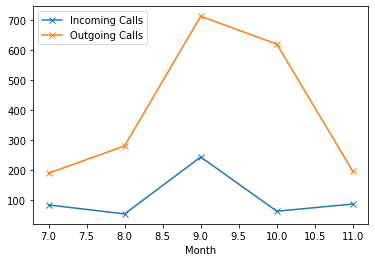

In [54]:
month.plot(x='Month', y=['Incoming Calls', 'Outgoing Calls'], marker='x')

3) Do you see anything unusual in the pattern? E.g. does this look like a phone line that
was used for criminal activities or more like a personal phone?


Yes, there is an unusual spike in September for both the incoming and the outgoing calls and they both are from Toronto,ON which suprisingly matches the numbers for both incoming and outgoing calls. Both very unusual and seem like criminal activity.

# Q 1.6 Distribution of Calls

1) Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client
called, y-axis: number of clients called

In [72]:
ob = df3.groupby('Number called to/from')['Call type'].count().reset_index()
ob

,Number called to/from,Call type
0,A_1,111
1,A_2,2
2,A_3,2
3,A_4,12
4,A_5,48
5,B_1,2
6,B_2,4
7,B_3,28
8,B_4,3
9,B_5,1


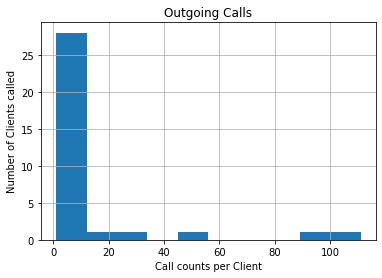

In [77]:
ob.hist(column='Call type')
plt.xlabel('Call counts per Client')
plt.ylabel('Number of Clients called')
plt.title("Outgoing Calls")
plt.show()